In [51]:
import os
import pickle, bz2

import tqdm
from bokeh.io import output_notebook, show



In [3]:
# loader
def load_dataset(file_path):
    with bz2.BZ2File(file_path, 'rb') as f:
        dataset = pickle.load(f)
    return dataset

def print_dataset_structure(dataset_dict, name=None):
    first_level_keys = set()
    second_level_keys = set()
    third_level_keys = set()



    for key, value in dataset_dict.items():
        first_level_keys.add(key)
        if isinstance(value, dict):
            for sub_key in value.keys():
                second_level_keys.add(sub_key)
                if isinstance(value[sub_key], dict):
                    for sub_sub_key in value[sub_key].keys():
                        third_level_keys.add(sub_sub_key)

    if name is not None:
        print(f"Dataset Structure for Dataset: {name}")
    else:
        print("Dataset Structure:")


    print("----"*10)
    print("First Level Keys:")
    print(first_level_keys)
    print("----"*10)
    print("Second Level Keys:")
    print(list(second_level_keys)[:10])
    print("----"*10)
    print("Third Level Keys:")
    print(third_level_keys)
    print("----"*10)
    print("\n")

def print_all_datasets_structure(dataset_path_list):
    for dataset_pkl in dataset_pkls:
        dataset_path = os.path.join(data_dir, dataset_pkl)
        dataset_dict = load_dataset(dataset_path)
        print_dataset_structure(dataset_dict, name=dataset_pkl)
        del dataset_dict

# get all split_n_bar_phrases from last key
def get_split_n_bar_phrases(dataset_path_list):
    if not isinstance(dataset_path_list, list):
        dataset_path_list = [dataset_path_list]

    split_n_bar_phrases = list()

    for dataset_pkl_ in dataset_path_list:
        dataset_dict_ = load_dataset(os.path.join(data_dir, dataset_pkl_))
        for key, value in dataset_dict_.items():
            for sub_key, sub_value in value.items():
                hvo_splits = sub_value['split_n_bar_phrases']
                for hvo_split in hvo_splits:
                    hvo_split.metadata.update({'collection': dataset_pkl_.replace('.pkl.bz2', ''), 'sample_id': sub_key})

                split_n_bar_phrases.extend(sub_value['split_n_bar_phrases'])

    return split_n_bar_phrases

import random

def get_randome_phrases(split_n_bar_phrases, n=1):
    # returns hvos and their indexes in the split_n_bar_phrases list
    if not isinstance(split_n_bar_phrases, list):
        split_n_bar_phrases = [split_n_bar_phrases]
    sample_ix = random.sample(range(len(split_n_bar_phrases)), n)
    sample_hvo_phrases = [split_n_bar_phrases[ix] for ix in sample_ix]

    return sample_hvo_phrases, sample_ix




from bokeh.models import Tabs, TabPanel
import warnings
import logging
from bokeh.util.warnings import BokehUserWarning, BokehDeprecationWarning

def setup_quiet_bokeh():
    """Set up comprehensive bokeh warning suppression"""
    # Suppress warnings
    warnings.filterwarnings("ignore", category=BokehUserWarning)
    warnings.filterwarnings("ignore", category=BokehDeprecationWarning)
    warnings.filterwarnings("ignore", message=".*bokeh.*")

    # Suppress logging
    logging.getLogger('bokeh').setLevel(logging.ERROR)

    # Suppress other common warnings that might appear with bokeh
    warnings.filterwarnings("ignore", category=FutureWarning)
    warnings.filterwarnings("ignore", category=UserWarning)

def create_multitab_from_figures(hvos,  tab_titles=None, show_tabs= True):
    """
    Create a multitab visualizer from already-generated bokeh figures.

    Parameters:
    -----------
    figures : List
        List of bokeh figure objects
    tab_titles : List[str]
        List of titles for each tab
    show_tabs : bool, default=True
        Whether to immediately show the tabs

    Returns:
    --------
    Tabs
        Bokeh Tabs object containing all the figures
    """
    setup_quiet_bokeh()
    output_notebook()

    figures = []

    generate_titles = False
    if tab_titles is None:
        tab_titles = []
        generate_titles = True

    if not isinstance(hvos, list):
        hvos = [hvos]
    for ix, hvo in enumerate(hvos):
        figure = hvo.to_html_plot(
            filename='',
            save_figure=False,
            show_figure=False)
        figures.append(figure)
        if generate_titles:
            tab_titles.append(f"Tab {ix+1}")

    if not isinstance(tab_titles, list):
        tab_titles = [tab_titles]
    if not tab_titles:
        tab_titles = [f"Tab {i+1}" for i in range(len(figures))]
    if len(figures) == 0:
        raise ValueError("No figures provided to create tabs")

    if len(figures) != len(tab_titles):
        raise ValueError("Number of figures must match number of tab titles")

    panels = []

    for figure, title in zip(figures, tab_titles):
        panel = TabPanel(child=figure, title=title)
        panels.append(panel)

    tabs = Tabs(tabs=panels)

    if show_tabs:
        show(tabs)

    return tabs




In [4]:
# LOAD DATASETS

data_dir = "data/triple_streams/split_2bars/rest"

# find all .pkl.bz2 files in the directory
dataset_pkls = [f for f in os.listdir(data_dir) if f.endswith('.pkl.bz2')]

# print the structure of each dataset
print_all_datasets_structure(dataset_pkls)

# load all loops from all datasets
split_n_bar_phrases = get_split_n_bar_phrases(dataset_pkls)

# print the number of phrases loaded
print(f"Number of split_n_bar_phrases loaded: {len(split_n_bar_phrases)}")


/Users/bezha/anaconda3/envs/TripleStreams/lib/python3.9/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Dataset Structure for Dataset: taptamdrum_hvo_output_both_is_and.pkl.bz2
----------------------------------------
First Level Keys:
{'AllAvailableStreams'}
----------------------------------------
Second Level Keys:
['310_p1_complex', '315_p1_complex', '12_p4_rep2', '14_p4_rep0', '73_p2_complex', '300_p1_complex', '291_p1_complex', '196_p1_simple', '58_p1_rep0', '5_p1_rep2']
----------------------------------------
Third Level Keys:
{'filenames', 'hvo_sequences', 'compiled_single_hvos', 'split_n_bar_phrases'}
----------------------------------------


Dataset Structure for Dataset: taptamdrum_hvo_output_both_is_or.pkl.bz2
----------------------------------------
First Level Keys:
{'AllAvailableStreams'}
----------------------------------------
Second Level Keys:
['310_p1_complex', '315_p1_complex', '12_p4_rep2', '14_p4_rep0', '73_p2_complex', '300_p1_complex', '291_p1_complex', '196_p1_simple', '58_p1_rep0', '5_p1_rep2']
----------------------------------------
Third Level Keys:
{'file

In [6]:
# INSPECT SOME HVO SAMPLES
create_multitab_from_figures(split_n_bar_phrases[2000:2010], show_tabs=True)


Loading BokehJS ...

Tabs(id='p3624', ...)

In [45]:
import numpy as np

def get_accent_hits_from_velocities(velocity_flat, accent_thresh=0.7):
    """
    Extract accent hits from the velocity flat representation of HVO.
    :param velocity_flat: a (B, T, 1) or (T, 1) numpy array where the last  column represents the velocity of hits.
    :param use_median: if True, use the median velocity to determine accent hits, otherwise use 0.5
    :return:
    """
    assert velocity_flat.ndim == 1 or velocity_flat.shape[-1] == 1, "Velocity flat must have 1 columns (hits, velocity, offset)"
    return np.where(velocity_flat > accent_thresh, 1, 0)

def get_split_to_streams(hvo_sample, groove_dim=0):
    """
    Split the HVO sample into input groove, streams, and flat output HVO.

    Parameters:
    -----------
    hvo_sample : HVOSequence
        The HVO sample to be split.
    groove_dim : int, optional
        The index of the groove dimension in the HVO sample. Default is 0.

    Returns:
    --------
    input_hvo : HVOSequence
        The input groove extracted from the HVO sample.
    streams : list of HVOSequence
        List of streams extracted from the HVO sample, excluding the groove dimension.
    flat_out_hvo : HVOSequence
        The flat output HVO sequence with the groove dimension set to zero.
    """
    # get input groove
    n_streams = hvo_sample.hits.shape[1]

    input_hvo = hvo_sample.hvo[:, (groove_dim, groove_dim+n_streams, groove_dim+2*n_streams)]

    # get flat of rest
    flat_hvo = hvo_sample.copy()
    flat_hvo.hvo[:, groove_dim] = 0                             # remove groove hit
    flat_hvo.hvo[:, (groove_dim + n_streams)] = 0               # remove groove vel
    flat_hvo.hvo[:, (groove_dim + n_streams*2)] = 0             # remove groove offset
    flat_out_hvo  = flat_hvo.flatten_voices(reduce_dim=True)

    # streams
    streams = []
    for i in range(n_streams):
        if i != groove_dim:
            streams.append(hvo_sample.hvo[:, (i, i+n_streams, i+2*n_streams)])

    return input_hvo, streams, flat_out_hvo

def Jaccard_similarity(a, b):
    intersection = np.sum(np.minimum(a, b))
    union = np.sum(np.maximum(a, b))
    return (intersection / union)

def hamming_distance(a, b):
    if len(a) != len(b):
        raise ValueError("Sequences must be of equal length")
    return sum(x != y for x, y in zip(a, b))/ len(a)

def get_control_features(hvo_sample, groove_dim):
    """
    Extract control features from the HVO sample.
    :param hvo_sample: HVOSequence
        The HVO sample to extract control features from.
    :param groove_dim: int
        The index of the groove dimension in the HVO sample.
    :return: dict
        A dictionary containing the control features.
    """
    input_hvo, out_streams, flat_out_hvo = get_split_to_streams(hvo_sample, groove_dim=groove_dim)

    input_hits = input_hvo[:, 0]
    flat_out_hits = flat_out_hvo[:, 0]

    analysis_dict = {
        "groove_to_output_hit_hamming_distance": float(hamming_distance(input_hits, flat_out_hits)),
    }

    input_velocities = input_hvo[:, 1]
    input_accent_hits = get_accent_hits_from_velocities(input_velocities)
    flat_out_velocities = flat_out_hvo[:, 1]
    flat_out_accent_hits = get_accent_hits_from_velocities(flat_out_velocities)
    analysis_dict.update({
        "groove_to_output_accent_hamming_distance": float(hamming_distance(input_accent_hits, flat_out_accent_hits)),
    })

    # calculate hit
    analysis_dict.update({f"out_stream_{i}_jaccard_sim_with_flat_out": float(Jaccard_similarity(out_streams[i][:, 0], flat_out_hits)) for i in range(len(out_streams))})
    analysis_dict.update({f"out_stream_{i}_accent_hamming_distance_with_flat_out": float(hamming_distance(get_accent_hits_from_velocities(out_streams[i][:, 1]), flat_out_accent_hits)) for i in range(len(out_streams))})


    return analysis_dict



In [46]:
hvo_samples, sample_indices = get_randome_phrases(split_n_bar_phrases, n=1)
create_multitab_from_figures(hvo_samples, [f"ix: {ix}" for ix in sample_indices], show_tabs=True)
get_control_features(hvo_samples[0], groove_dim=0)

Loading BokehJS ...

{'groove_to_output_hit_hamming_distance': 0.4375,
 'groove_to_output_accent_hamming_distance': 0.375,
 'out_stream_0_jaccard_sim_with_flat_out': 0.3076923076923077,
 'out_stream_1_jaccard_sim_with_flat_out': 1.0,
 'out_stream_2_jaccard_sim_with_flat_out': 0.5384615384615384,
 'out_stream_0_accent_hamming_distance_with_flat_out': 0.375,
 'out_stream_1_accent_hamming_distance_with_flat_out': 0.09375,
 'out_stream_2_accent_hamming_distance_with_flat_out': 0.0}

In [52]:
# Extract control features for all samples
control_features = {
    "sample_id": [],
    "collection": [],
    "groove_to_output_hit_hamming_distance": [],
    "groove_to_output_accent_hamming_distance": [],
    "out_stream_0_jaccard_sim_with_flat_out": [],
    "out_stream_0_accent_hamming_distance_with_flat_out": [],
    "out_stream_1_jaccard_sim_with_flat_out": [],
    "out_stream_1_accent_hamming_distance_with_flat_out": [],
    "out_stream_2_jaccard_sim_with_flat_out": [],
    "out_stream_2_accent_hamming_distance_with_flat_out": [],
}

for hvo_sample in tqdm.tqdm(split_n_bar_phrases):
    control_features["sample_id"].append(hvo_sample.metadata['sample_id'])
    control_features["collection"].append(hvo_sample.metadata['collection'])

    features = get_control_features(hvo_sample, groove_dim=0)
    for key, value in features.items():
        control_features[key].append(value)

# Convert to DataFrame
import pandas as pd
control_features_df = pd.DataFrame(control_features)


 51%|█████     | 45728/89340 [00:06<00:06, 6487.40it/s]/var/folders/lr/8ctpqx7n6m54ydpt525nf6q80000gn/T/ipykernel_30144/1922766373.py:56: RuntimeWarning: invalid value encountered in scalar divide
  return (intersection / union)
100%|██████████| 89340/89340 [00:13<00:00, 6614.81it/s]


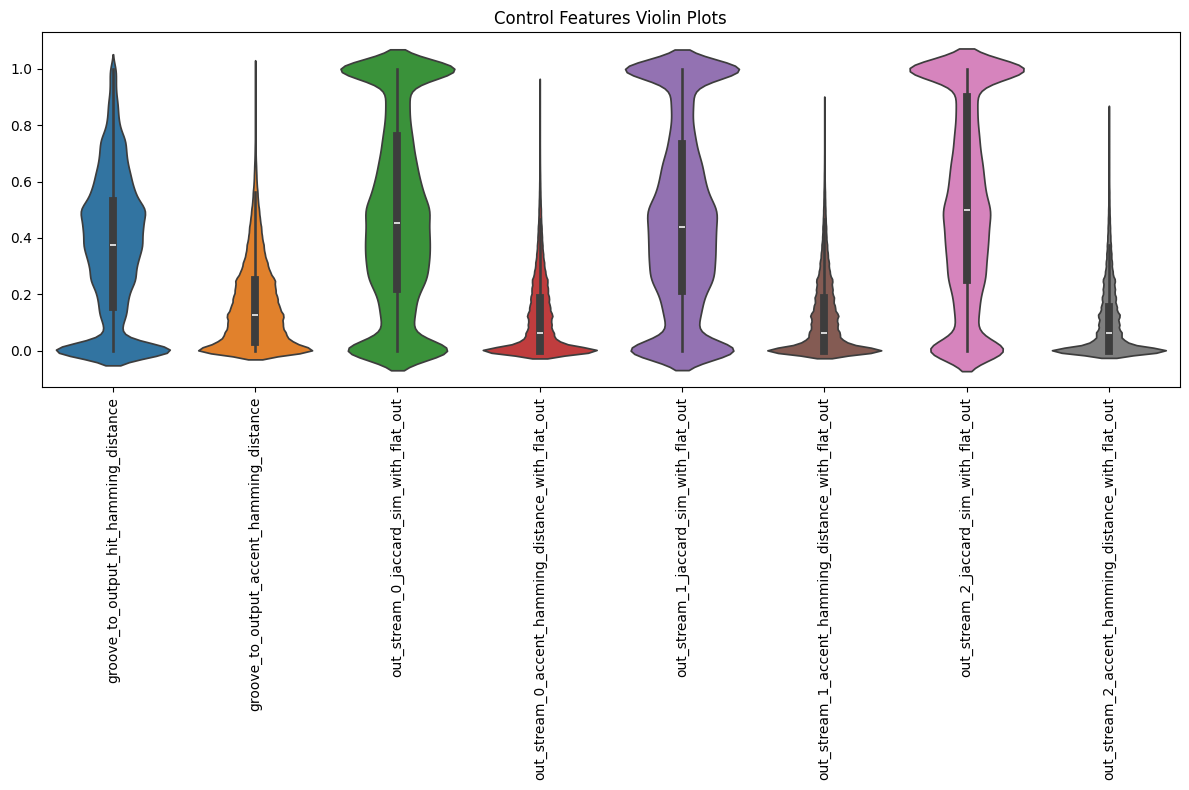

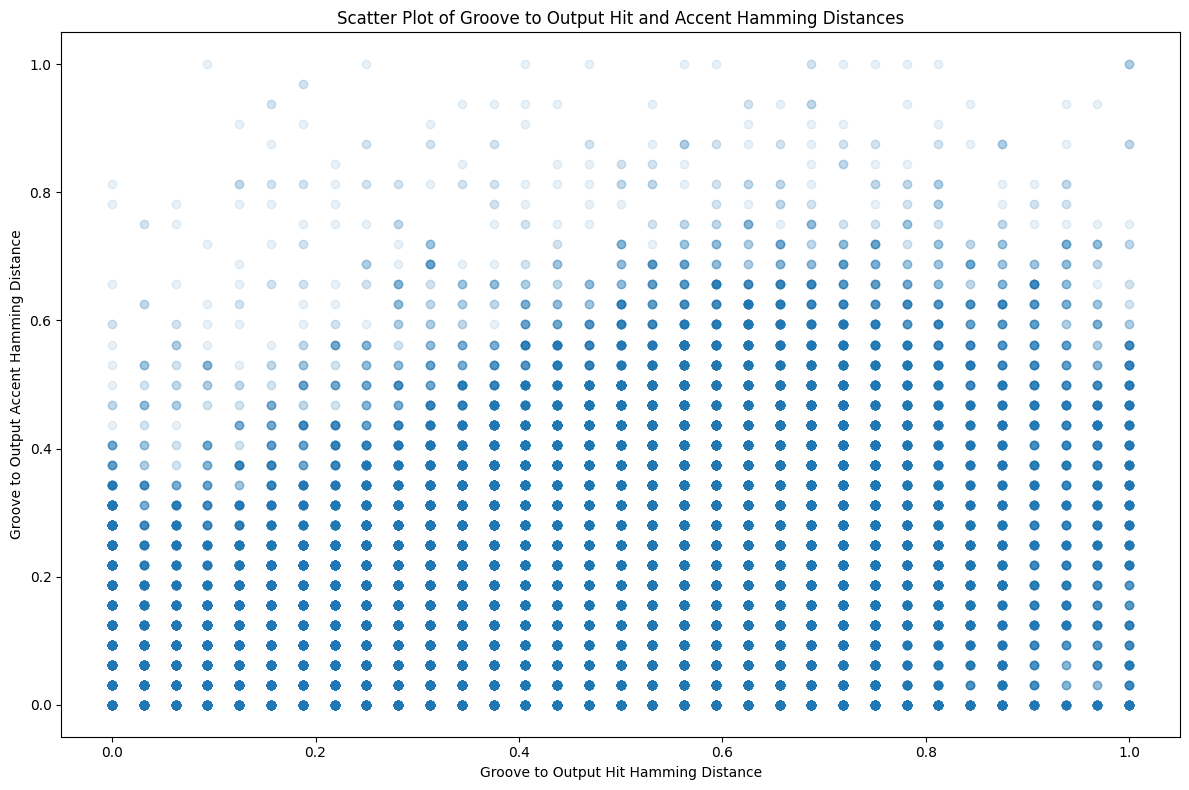

In [60]:
# plot violin plots of the control features
import seaborn as sns
import matplotlib.pyplot as plt
def plot_control_features_violin(control_features_df):
    """
    Plot violin plots of the control features.
    :param control_features_df: pd.DataFrame
        DataFrame containing the control features.
    """
    plt.figure(figsize=(12, 8))
    sns.violinplot(data=control_features_df.drop(columns=["sample_id", "collection"]))
    plt.xticks(rotation=90)
    plt.title("Control Features Violin Plots")
    plt.tight_layout()


    plt.show()

# plot the  scatter of groove to output hit hamming distance and groove to output accent hamming distance
def plot_scatter_input_output_distribution(control_features_df):
    plt.figure(figsize=(12, 8))
    x = control_features_df["groove_to_output_hit_hamming_distance"]
    y = control_features_df["groove_to_output_accent_hamming_distance"]
    plt.scatter(x, y, alpha=0.1)
    plt.xlabel("Groove to Output Hit Hamming Distance")
    plt.ylabel("Groove to Output Accent Hamming Distance")
    plt.title("Scatter Plot of Groove to Output Hit and Accent Hamming Distances")
    plt.tight_layout()
    plt.show()

plot_control_features_violin(control_features_df)

plot_scatter_input_output_distribution(control_features_df)